# Lab D : Amazing Research Project !!!
By Simon Van Norden & Nicolas Harvie
***

## Bridging PCA and Asset Pricing

You are aware that researchers use a number of models to explain market returns. However, you also know that the numbers of factors in these models only tend to increase... Therefore, you decide you should try and apply PCA to these factors and try to predict future returns based on lagged values. 

In [1]:
# Our Imports
import pandas as pd 
import numpy as np 
import pandas_datareader as pdr
import statsmodels.api as sm
from scipy.optimize import minimize
import math 


import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns 
from IPython.display import Image

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Determining our factors
factors = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3', start='2010', end='2021')[0].iloc[:,0:5]
factors.insert(loc=1, column='MOM', value=pdr.get_data_famafrench('F-F_Momentum_Factor', start='2010', end='2021')[0].iloc[:,0])
factors

,Mkt-RF,MOM,SMB,HML,RMW,CMA
Date,,,,,,
2010-01,-3.36,-5.40,0.34,0.43,-1.27,0.46
2010-02,3.40,3.74,1.51,3.23,-0.27,1.43
2010-03,6.31,3.76,1.85,2.21,-0.65,1.69
2010-04,2.00,3.16,4.98,2.89,0.69,1.72
2010-05,-7.89,-0.25,0.04,-2.44,1.30,-0.22
...,...,...,...,...,...,...
2020-09,-3.63,3.12,0.01,-2.68,-1.39,-1.89
2020-10,-2.10,-3.05,4.64,4.22,-0.75,-0.76
2020-11,12.47,-12.43,7.12,2.13,-2.20,1.37


In [3]:
# Producing Our lagged factors
lagged_factors = factors.shift(1).dropna()
lagged_factors

,Mkt-RF,MOM,SMB,HML,RMW,CMA
Date,,,,,,
2010-02,-3.36,-5.40,0.34,0.43,-1.27,0.46
2010-03,3.40,3.74,1.51,3.23,-0.27,1.43
2010-04,6.31,3.76,1.85,2.21,-0.65,1.69
2010-05,2.00,3.16,4.98,2.89,0.69,1.72
2010-06,-7.89,-0.25,0.04,-2.44,1.30,-0.22
...,...,...,...,...,...,...
2020-09,7.63,0.55,-0.89,-2.96,4.26,-1.20
2020-10,-3.63,3.12,0.01,-2.68,-1.39,-1.89
2020-11,-2.10,-3.05,4.64,4.22,-0.75,-0.76


In [4]:
Image(url="../slide_images/Factors_Models.png", width=700, height=500)

Ouch ! Too many factors and we don't even have our dependent variable yet...

In [5]:
# Remember the PCA objective ! 
Image(url="../slide_images/PCA_Review.png", width=700, height=500)

In [6]:
# Covariant Matrix to do PCA
lagged_factors = lagged_factors.cov()
lagged_factors

,Mkt-RF,MOM,SMB,HML,RMW,CMA
Mkt-RF,18.186998,-4.579644,4.864840,2.621418,-0.943140,-0.269540
MOM,-4.579644,11.761142,-2.737962,-4.065064,0.376073,-0.733165
SMB,4.864840,-2.737962,6.420950,2.314298,-1.426555,0.229982
HML,2.621418,-4.065064,2.314298,7.047567,-0.303612,2.061402
RMW,-0.943140,0.376073,-1.426555,-0.303612,2.362323,0.044646
CMA,-0.269540,-0.733165,0.229982,2.061402,0.044646,2.178555


In [7]:
eval, evec = np.linalg.eigh(lagged_factors)

In [8]:
# My Eigenvalues
ordered_eval = eval[::-1]
ordered_eval

array([23.99911855, 10.77335684,  5.59113325,  4.45925666,  1.84658114,
        1.28808872])

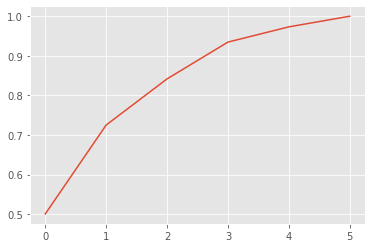

In [9]:
plt.plot((ordered_eval/ordered_eval.sum()).cumsum())

In [10]:
# My EigenVectors
ordered_evec = evec[::-1]
pd.DataFrame(ordered_evec)

,0,1,2,3,4,5
0,-0.903528,0.057026,-0.266061,-0.275113,-0.180656,-0.035683
1,-0.004765,-0.921061,-0.347126,0.162347,-0.016173,0.067157
2,0.415140,0.050618,-0.451023,-0.592794,-0.437997,-0.280050
3,-0.077644,-0.378405,0.723518,-0.468236,-0.018802,-0.328184
4,0.060071,-0.023463,-0.143734,-0.562186,0.669164,0.459726
5,-0.040444,0.045741,-0.247297,0.106083,0.571949,-0.772487


In [11]:
# My Principal Components
# We choose only one in this context 
PC_df = factors @ evec
ordered_PC_df = PC_df.iloc[:, ::-1]
My_PC = pd.DataFrame(ordered_PC_df.iloc[:, 0]).rename(columns={5: 'PC1'})
My_PC

,PC1
Date,
2010-01,-0.220668
2010-02,-2.376361
2010-03,-4.475833
2010-04,-2.550977
2010-05,6.745342
...,...
2020-09,4.959817
2020-10,-2.507773
2020-11,-18.477109


In [12]:
# A quick verification 
My_PC.var()

PC1    23.821786
dtype: float64

In [13]:
# Setting up our Regression
# We are Interested in the excess returns of the Technology sector ($$) 
tech_returns = pdr.get_data_famafrench('5_Industry_Portfolios', start='2010', end='2021')[0]['HiTec']
tech_returns.subtract(pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3', start='2010', end='2021')[0]['RF'])
tech_returns

Date
2010-01    -7.62
2010-02     4.36
2010-03     6.88
2010-04     2.49
2010-05    -7.27
           ...  
2020-09    -4.82
2020-10    -2.02
2020-11    11.17
2020-12     4.99
2021-01     0.17
Freq: M, Name: HiTec, Length: 133, dtype: float64

In [14]:
# Setting up our Regression 
reg_df = pd.merge(tech_returns, My_PC, left_index=True, right_index=True)
reg_df

,HiTec,PC1
Date,,
2010-01,-7.62,-0.220668
2010-02,4.36,-2.376361
2010-03,6.88,-4.475833
2010-04,2.49,-2.550977
2010-05,-7.27,6.745342
...,...,...
2020-09,-4.82,4.959817
2020-10,-2.02,-2.507773
2020-11,11.17,-18.477109


In [15]:
res = sm.OLS(reg_df.iloc[:, 0], sm.add_constant(reg_df.iloc[:, 1:]), missing = 'drop', hasconst=True).fit()

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HiTec   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           2.56e-27
Time:                        11:25:10   Log-Likelihood:                -330.78
No. Observations:                 133   AIC:                             665.6
Df Residuals:                     131   BIC:                             671.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0294      0.257      4.010      0.000       0.522       1.537
PC1           -0.7219      0.052    -13.805      0.000      -0.825      -0.618
==============================================================================
Omnibus:                        1.185   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                0.858
Skew:                          -0.186   Prob(JB):                        0.651
Kurtosis:                       3.131   Cond. No.                         4.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### If we had more time...

In [17]:
# Add some controls
Image(url="../slide_images/AP_Tests1.png", width=700, height=500)

In [18]:
# Find some Alpha
Image(url="../slide_images/AP_Tests2.png", width=700, height=500)

## Making Sense out of Maximum Likelihood Estimation 

Reference: https://analyticsindiamag.com/maximum-likelihood-estimation-python-guide/

You have heard that it is possible to obtain the same estimators for Beta using Maximum Likelihood Estimation given that the regression residuals follow a defined distribution. You decide to try it out with the prior regression.

In [19]:
# Introduction
Image(url="../slide_images/MLE_Slides0.png", width=700, height=500)

In [20]:
# A prior example 
Image(url="../slide_images/MLE_Slides1.png", width=700, height=500)

In [21]:
# A true example 
Image(url="../slide_images/MLE_CAPM1.png", width=600, height=500)

In [22]:
# Where does this equation come from ? 
Image(url="../slide_images/Normal.png", width=400, height=300)

In [23]:
# CAPM Example Followed
Image(url="../slide_images/MLE_CAPM2.png", width=600, height=500)

In [24]:
def MLE_Norm(parameters):
   # extract parameters
   const, beta, std_dev = parameters
   # predict the output
   resid = reg_df.iloc[:, 0] - const - beta*reg_df.iloc[:, 1]
   # Calculate the log-likelihood for normal distribution
   LL = np.sum(stats.norm.logpdf(resid, scale=std_dev)) # This is of interest
   # Calculate the negative log-likelihood
   neg_LL = -1*LL
   return neg_LL 

In [25]:
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model.x

array([ 1.02941682, -0.72185241,  2.91003722])

In [26]:
# How cool !
standard_dev = np.sqrt(res.mse_resid)
standard_dev

2.932161287263204

In [27]:
# Remember this?
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HiTec   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           2.56e-27
Time:                        11:25:10   Log-Likelihood:                -330.78
No. Observations:                 133   AIC:                             665.6
Df Residuals:                     131   BIC:                             671.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0294      0.257      4.010      0.000       0.522       1.537
PC1           -0.7219      0.052    -13.805      0.000      -0.825      -0.618
==============================================================================
Omnibus:                        1.185   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                0.858
Skew:                          -0.186   Prob(JB):                        0.651
Kurtosis:                       3.131   Cond. No.                         4.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# CAPM Example Followed
Image(url="../slide_images/MLE_CAPM3.png", width=600, height=500)

In [29]:
Image(url="../slide_images/MLE_Slides2.png", width=600, height=500)

### A Word on Testing 

In [30]:
Image(url="../slide_images/Hyp1.png", width=600, height=500)

In [31]:
Image(url="../slide_images/Hyp2.png", width=600, height=500)